# VO: Visual odometry

Given a sequence of images:
$$
\{ 
    I_1, I_2, \cdot\cdot\cdot, I_n
\}
$$
Find the motion / trajectory 

$$
\{ 
(R_1, t_1), (R_2, t_2), \cdot\cdot\cdot, (R_{n-1}, t_{n-1})
\}
$$

such that 
$$
\{
 R_i f(I_i) + t_i \quad \text{best aligns with} \quad f(I_{i+1}), \quad i = 1, 2,...,n-1)  
\}
$$


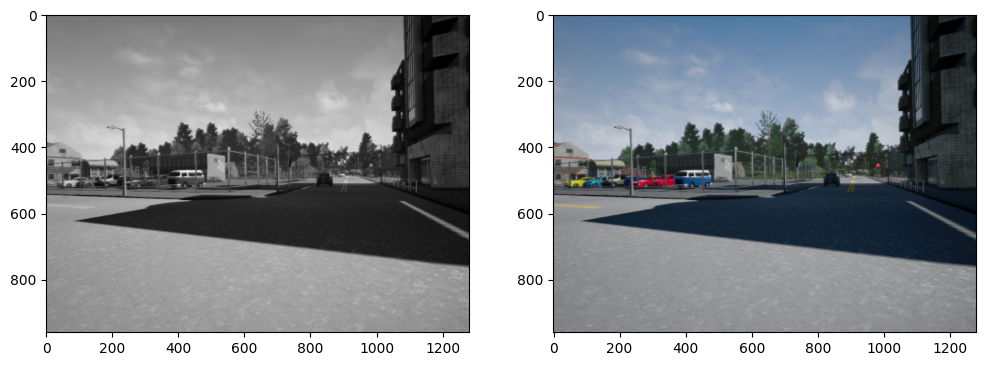

In [ ]:
import cv2
from m2bk import *
import numpy as np
from matplotlib import pyplot as plt

data = DatasetHandler()
images = data.images 
rgb_images = data.images_rgb
depths = data.depth_maps

# plot images[0], rgb_images[0] side by side
_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(images[0], cmap='grey')
ax[1].imshow(rgb_images[0])

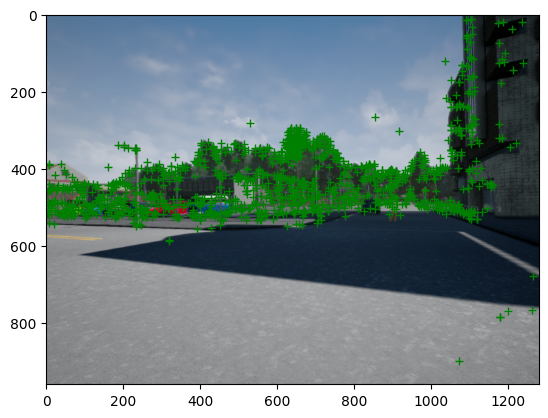

In [ ]:
# extract features of the image
# returns:
# 1) a list of cv2.KeyPoint [kp1, kp2, ..., kpN]
# 2) an array of (128, ) vectors. 
#    each 128-vector represents a feature/keypoint descriptor  
def f(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

keypoints, descriptors = f(images[0])

def visualize_features(img, keypoints):
    ax = plt.subplot()
    ax.imshow(img)
    x = [ int(kp.pt[0]) for kp in keypoints ]
    y = [ int(kp.pt[1]) for kp in keypoints ]
    ax.plot(x, y, "g+")

visualize_features(rgb_images[0], keypoints)

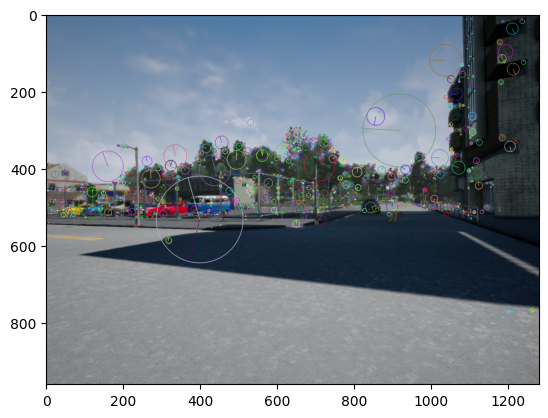

In [13]:
def cv2_visualize_features(img, keypoints):
    img_with_kp = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_with_kp)

cv2_visualize_features(rgb_images[0], keypoints)